In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal as mvn

In [59]:
mu = np.array([0,2])
cov = np.array([[1,0.8],[0.8,6]])

In [60]:
r = mvn.rvs(mean=mu,cov=cov, size=1000)

In [61]:
print(r)

[[-1.19256185  2.21075699]
 [-0.38008411  1.86731286]
 [-0.08064869  2.98182947]
 ...
 [ 1.10663958  3.57531238]
 [ 0.58665372 -1.41149225]
 [ 0.67103742  4.27991535]]


In [62]:
x = r[:,0]
y = r[:,1]

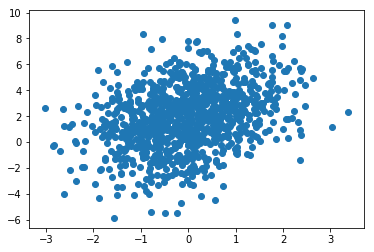

In [63]:
plt.scatter(x,y)

# Using Numpy

In [64]:
r = np.random.multivariate_normal(mean=mu,cov=cov,size=1000)
print(r)

[[-0.50945157  3.50280838]
 [-1.63839868 -4.53497642]
 [-0.00671432  3.44582653]
 ...
 [ 0.28405636  3.13667724]
 [-0.17810313  1.25018728]
 [ 0.47318338 -1.5794832 ]]


In [65]:
x = r[:,0]
y = r[:,1]

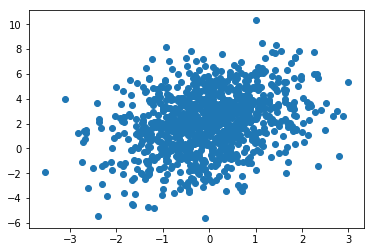

In [66]:
plt.scatter(x,y)

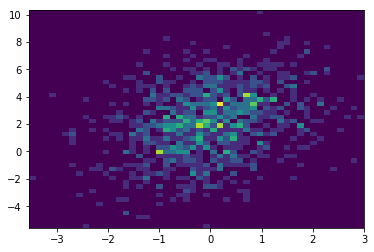

In [67]:
plt.hist2d(x,y,bins=50)
plt.show()